### Reliable project

Install in a separare virtual enviroment (namely shapely, geocondas and fiona from pip, not conda), otherwise will may get error due to different versions ('Shell is not a LinearRing'error) when reading shapefiles with geopandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import descartes

Datasets are also here: https://github.com/INmais/reliable/tree/master/data_notebooks

In [2]:
#this will not be used for now
df = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#had to change encoding
df.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
0,2011,'PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521,NaN
1,2011,'1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144,NaN
2,2011,'11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020,NaN
3,2011,'118,Alto Trás-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,6669,68441,63100,103862,7725,13567,47149,29828,58694,NaN
4,2011,'1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,246,3098,3866,6049,692,604,1802,1235,2741,NaN


In [3]:
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df1["IV"] = pd.to_numeric(df1["IV"])
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


In [4]:
###Geopandas Shell is not a LinearRing bug (needs clean enviroment, otherwise problem with shapefiles version)
fp = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"

map_df = gpd.read_file(fp) #this is for geopandas

In [5]:
map_df['Freguesias'] = map_df["DTMN11"] + map_df["FR11"]

In [6]:
Dictionary = {
    '170601': 10,
    '170602': 10,
    '170603': 11,
    '170604': 11,
    '170605': 10,
    '170606': 10,
    '170607': 11,
    '170608': 9,
    '170609': 11,
    '170610': 9,
    '170611': 14,
    '170612': 10,
    '170613': 11,
    '170614': 12,
    '170615': 9,
    '170616': 10,
    '170617':9,
    '170618': 10,
    '170619': 10,
    '170620': 11,
    '170621': 9,
    '170622': 11,
    '170623': 10,
    '170624': 11,
    '170625': 14,
    '170626': 10,
    '170627': 10,
    '170628': 12,
    '170629': 9,
    '170630': 11,
    '170631': 11,
    '170632':10,
    '170633': 12,
    '170634': 9,
    '170635': 11
}
print (Dictionary)

{'170601': 10, '170602': 10, '170603': 11, '170604': 11, '170605': 10, '170606': 10, '170607': 11, '170608': 9, '170609': 11, '170610': 9, '170611': 14, '170612': 10, '170613': 11, '170614': 12, '170615': 9, '170616': 10, '170617': 9, '170618': 10, '170619': 10, '170620': 11, '170621': 9, '170622': 11, '170623': 10, '170624': 11, '170625': 14, '170626': 10, '170627': 10, '170628': 12, '170629': 9, '170630': 11, '170631': 11, '170632': 10, '170633': 12, '170634': 9, '170635': 11}


In [7]:
map_df["IV"] = map_df['Freguesias'].map(Dictionary)

In [8]:
map_df['Freguesias'] #confirmar

0       170634
1       170625
2       170626
3       170612
4       170608
5       170608
6       170626
7       170609
8       170626
9       170626
10      170626
11      170612
12      170620
13      170626
14      170626
15      170626
16      170626
17      170626
18      170626
19      170626
20      170626
21      170626
22      170626
23      170626
24      170626
25      170626
26      170626
27      170626
28      170626
29      170607
         ...  
1387    170630
1388    170630
1389    170630
1390    170630
1391    170630
1392    170602
1393    170613
1394    170602
1395    170613
1396    170613
1397    170613
1398    170613
1399    170606
1400    170615
1401    170608
1402    170608
1403    170613
1404    170615
1405    170615
1406    170615
1407    170613
1408    170608
1409    170615
1410    170615
1411    170613
1412    170615
1413    170628
1414    170628
1415    170628
1416    170617
Name: Freguesias, Length: 1417, dtype: object

In [9]:
ax0 = map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

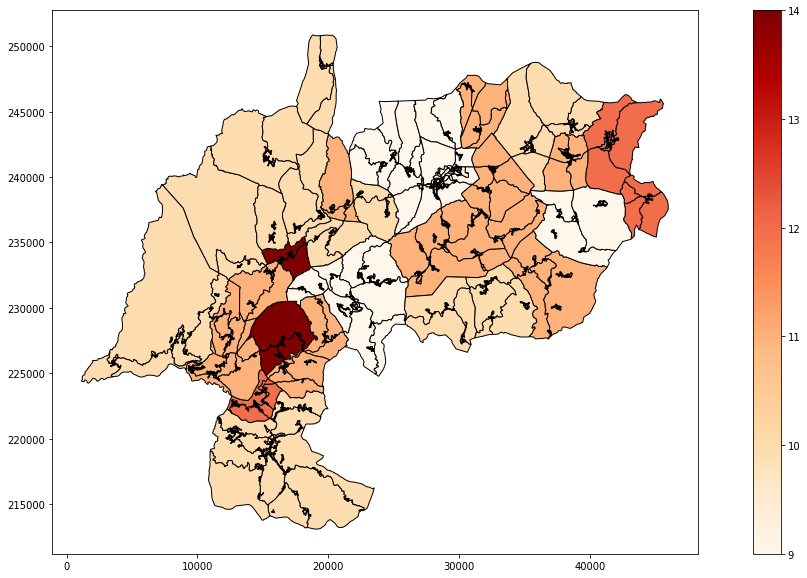

In [10]:
map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

## Adding locations


In [11]:
# initialize list of lists 
lares = [['Centro Social e Paroquial de Cabril', 41.714849, -8.034901, 30], 
         ['Centro Social e Paroquial de Vilar de Perdizes', 41.855523, -7.633986, 10], 
         ['Lar Monte Sereno', 41.798622, -7.666606, 37],
         ['Lar Nossa Senhora do Pranto',41.641292, -7.945080,30],
         ['Lar dos Pisões para Seniores', 41.737331, -7.869785, 22],
         ['Santa Casa da Misericórdia - Lar', 41.822516, -7.790499, 80],
         ['Residencial Santa Clara', 41.785061, -7.781880, 36]]
    
# Create the pandas DataFrame 
df = pd.DataFrame(lares, columns = ['Name', 'lat', 'long', 'pop']) 

#where as Geographic coordinates are (y,x) = (lat,lon)
# print dataframe. 
df.plot

In [12]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df['geometry'] = df.apply(lambda x: Point((float(x.long), float(x.lat))), axis=1)

In [13]:
CRS = map_df.crs

print(CRS)

{'init': 'epsg:3763'}


In [14]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [15]:
df.crs = {'init':'epsg:3763'}

In [16]:
df.head()

,Name,lat,long,pop,geometry
0,Centro Social e Paroquial de Cabril,41.714849,-8.034901,30,POINT (-8.034901 41.714849)
1,Centro Social e Paroquial de Vilar de Perdizes,41.855523,-7.633986,10,POINT (-7.633986 41.855523)
2,Lar Monte Sereno,41.798622,-7.666606,37,POINT (-7.666606 41.798622)
3,Lar Nossa Senhora do Pranto,41.641292,-7.945080,30,POINT (-7.94508 41.641292)
4,Lar dos Pisões para Seniores,41.737331,-7.869785,22,POINT (-7.869785 41.737331)


In [17]:
df.crs = {'init':'epsg:3763'}

In [18]:
# Filepaths
# Check the data
map_df.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",170634,9
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",170625,14
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",170626,10
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",170612,10
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",170608,9


In [19]:
cols = list(map_df.columns.values)

In [20]:
map_df.crs

{'init': 'epsg:3763'}

In [21]:
from bokeh.plotting import figure, save

In [22]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [23]:
df['x'] = df.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

In [24]:
df['y'] = df.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [25]:
df.head()

,Name,lat,long,pop,geometry,x,y
0,Centro Social e Paroquial de Cabril,41.714849,-8.034901,30,POINT (-8.034901 41.714849),-8.034901,41.714849
1,Centro Social e Paroquial de Vilar de Perdizes,41.855523,-7.633986,10,POINT (-7.633986 41.855523),-7.633986,41.855523
2,Lar Monte Sereno,41.798622,-7.666606,37,POINT (-7.666606 41.798622),-7.666606,41.798622
3,Lar Nossa Senhora do Pranto,41.641292,-7.945080,30,POINT (-7.94508 41.641292),-7.945080,41.641292
4,Lar dos Pisões para Seniores,41.737331,-7.869785,22,POINT (-7.869785 41.737331),-7.869785,41.737331


In [27]:
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import pysal as ps

In [28]:
CRS = map_df.crs

In [29]:
# Convert the geometries of metro line and points into that one
df['geometry'] = df['geometry'].to_crs(crs=CRS)

In [30]:
df['geometry'].head(1)

0    POINT (-8.034901000004883 41.71484899986343)
Name: geometry, dtype: object

In [31]:
# Convert the geometries of metro line and points into that one
map_df['geometry'] = map_df['geometry'].to_crs(crs=CRS)

In [32]:
map_df['geometry'].head(1)

0    POLYGON ((26131.41890000001 232084.4857000005,...
Name: geometry, dtype: object

In [33]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [34]:
# Get the Polygon x and y coordinates
map_df['x'] = map_df.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
map_df['y'] = map_df.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

In [35]:
map_df[['x', 'y']].head(2)

,x,y
0,"[26131.418900000008, 26132.562300000398, 26133...","[232084.48570000048, 232080.94649999938, 23207..."
1,"[17805.883100000192, 17808.574099999885, 17811...","[228000.61740000008, 227994.93869999977, 22798..."


In [36]:
map_df.head(2)

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV,x,y
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41890000001 232084.4857000005,...",170634,9,"[26131.418900000008, 26132.562300000398, 26133...","[232084.48570000048, 232080.94649999938, 23207..."
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000019 228000.6174000001,...",170625,14,"[17805.883100000192, 17808.574099999885, 17811...","[228000.61740000008, 227994.93869999977, 22798..."


In [37]:
# Make a copy, drop the geometry column and create ColumnDataSource
p_df = df.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)

# Make a copy, drop the geometry column and create ColumnDataSource
g_df = map_df.drop('geometry', axis=1).copy()
gsource = ColumnDataSource(g_df)

In [38]:
# coloring that converts the color palet into map numbers
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

In [39]:
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.models import LogColorMapper, LogTicker, ColorBar
from bokeh.tile_providers import CARTODBPOSITRON


p = figure()


# Initialize our figure
p = figure(title="Vulnarability Index (Montalegre)", plot_width=800, plot_height=450, x_range=(0, 50000), y_range=(205000, 250000),
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON)


# Plot grid
mapping = p.patches('x', 'y', source=gsource,
         fill_color={'field': 'IV', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.5)

# Add schools on top (as yellow points)
#p.circle('x', 'y', size=3, source=psource, color="yellow")

# Modify legend location

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

p.add_layout(color_bar, 'right')

p.legend.location = "top_right"
p.legend.orientation = "vertical"

# Insert a circle on top of the Central Railway Station (coords in EurefFIN-TM35FIN)
station_x = -8.034901 
station_y =  41.714849
#circle = p.circle(x=[station_x], y=[station_y], name="point", size=6, color="yellow", legend="sin(x)")

# let's also add the hover over info tool
# Add two separate hover tools for the data
#phover = HoverTool(renderers=[circle])
#phover.tooltips=[('Name', '@Name'),
                   # ('population', '@pop')]

ghover = HoverTool(renderers=[mapping])
ghover.tooltips = [('IV', '@IV'),
                    ('Place', '@LUG11DESIG')]

p.add_tools(ghover)
#p.add_tools(phover)

# Save the figure
outfp = r"/Users/dvf/Documents/map.html"
output_file(outfp)
show(p)

/anaconda3/envs/geo/lib/python3.7/site-packages/bokeh/models/plots.py:748: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/anaconda3/envs/geo/lib/python3.7/site-packages/bokeh/models/plots.py:748: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
